<a href="https://colab.research.google.com/github/AIKevin/Deep-Learning/blob/master/Tuto_PyTorch_+_Digit_Recognition_(PyTorch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Computational graphs
The first thing to understand about any deep learning library is the idea of a computational graph. A computational graph is a set of calculations, which are called nodes, and these nodes are connected in a directional ordering of computation. In other words, some nodes are dependent on other nodes for their input, and these nodes in turn output the results of their calculations to other nodes. A simple example of a computational graph for the calculation a=(b+c)∗(c+2) can be seen below – we can break this calculation up into the following steps/nodes:

dea=b+c=c+2=d∗e
PyTorch tutorial - simple computational graph
Simple computational graph
 

The benefits of using a computational graph is that each node is like its own independently functioning piece of code (once it receives all its required inputs). This allows various performance optimizations to be performed in running the calculations such as threading and multiple processing / parallelism. All the major deep learning frameworks (TensorFlow, Theano, PyTorch etc.) involve constructing such computational graphs, through which neural network operations can be built and through which gradients can be back-propagated (if you’re unfamiliar with back-propagation, see my neural networks tutorial).

In [2]:
!pip install torchvision
!pip install torch

    100% |████████████████████████████████| 61kB 3.6MB/s 
    100% |████████████████████████████████| 2.0MB 8.4MB/s 
    100% |████████████████████████████████| 519.5MB 22kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x587ac000 @  0x7fcdf7c7b2a4 0x594e17 0x626104 0x51190a 0x4f5277 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x4f3338 0x510fb0 0x5119bd 0x4f6070
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [0]:
import tensorflow as tf
import torch 
import torch.nn as nn
import torch.nn.functional as F
import math
import matplotlib.pyplot as pp
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import tensorflow.keras.datasets.mnist as mnist
import tensorflow.keras as keras
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import time
import os
import copy
from __future__ import print_function, division
from torch.autograd import Variable


In [16]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'



Hello World !


#Tensors

In [38]:
#Declare a tensor of 3D
x=torch.Tensor(2,3,3)
print(color.BOLD+ color.GREEN+"torch.Tensor(2,3,3)"+color.END)
print(x)

#Declare a tensor filled with random values
y=torch.rand(2,3)
print(color.BOLD+ color.GREEN+"torch.rand(2,3)"+color.END)
print(y)

#Add and Multiply Tensors
z=torch.rand(2,3)
print(color.BOLD+ color.RED+color.UNDERLINE+"TENSOR SUM"+color.END)
print(color.BOLD+ color.BLUE+"y"+color.END)
print(y)
print(color.BOLD+ color.BLUE+"z"+color.END)
print(z)
print(color.BOLD+ color.BLUE+"y+z"+color.END)
print(y+z)
print(color.BOLD+ color.RED+color.UNDERLINE+"TENSOR SCALAR PRODUCT"+color.END)
print(color.BOLD+ color.BLUE+"y*z"+color.END)
print(y*z)
z2=torch.rand(3,2)
print(color.BOLD+ color.BLUE+"z2"+color.END)
print(z2)
print(color.BOLD+ color.RED+color.UNDERLINE+"TENSOR MATRIX PRODUCT"+color.END)
print(color.BOLD+ color.GREEN+"torch.matmul(y,z2)"+color.END)
print(torch.matmul(y,z2))
a=torch.ones(2,3)

print(color.BOLD+ color.BLUE+"a"+color.END)
print(a)
a[:,1] = a[:,1] + 1
print(color.BOLD+"We add 1 to column 2"+color.END)
print(color.BOLD+ color.GREEN+"a[:,1] = a[:,1] + 1"+color.END)
print(color.BOLD+ color.BLUE+"a after modification"+color.END)
print(a)

torch.Tensor(2,3,3)
tensor([[[1.8013e-35, 0.0000e+00, 1.3527e-35],
         [0.0000e+00, 2.2200e-21, 4.5600e-41],
         [1.3527e-35, 0.0000e+00, 0.0000e+00]],

        [[       nan, 1.4013e-45, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 5.0892e-14],
         [1.4308e+34, 3.8178e-17, 4.5600e-41]]])
torch.rand(2,3)
tensor([[0.1198, 0.0400, 0.4098],
        [0.8655, 0.2865, 0.4142]])
TENSOR SUM
y
tensor([[0.1198, 0.0400, 0.4098],
        [0.8655, 0.2865, 0.4142]])
z
tensor([[0.1136, 0.7924, 0.2321],
        [0.0056, 0.8588, 0.4267]])
y+z
tensor([[0.2334, 0.8324, 0.6419],
        [0.8711, 1.1454, 0.8409]])
TENSOR SCALAR PRODUCT
y*z
tensor([[0.0136, 0.0317, 0.0951],
        [0.0049, 0.2461, 0.1767]])
z2
tensor([[0.3233, 0.3359],
        [0.6569, 0.0970],
        [0.1171, 0.9628]])
TENSOR MATRIX PRODUCT
torch.matmul(y,z2)
tensor([[0.1130, 0.4387],
        [0.5165, 0.7173]])
a
tensor([[1., 1., 1.],
        [1., 1., 1.]])
We add 1 to column 2
a[:,1] = a[:,1] + 1
a after modification
ten

#Autograd in PyTorch
##Backpropagation

In [50]:
#We declare a variable with a tensor and specify it can backpropagates, meaning
#it is trainable
b = Variable(torch.ones(2, 2) * 2, requires_grad=True)

c = 2 * (b  * b ) + 5 *b 

#Now we compute the gradient/derivatives of var2 with the backwards function
#We store it in the grad attribute of b
c.backward(torch.ones(2, 2))
print(b.grad)

tensor([[13., 13.],
        [13., 13.]])


#Creating a neural network in PyTorch
##The neural network class

In [0]:
#We use the nn class to declare a new class which inherits from it
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #We specify the different layers of the Neural Nets
        #First Layer--> Inputs : 28*28 connected to 200 cells
        #Second Layer--> Neural layer of 200 cells connected to 200 cells
        #Third Layer--> Neural layer of 200 cells connected to a 10-output layer
        #Linear is for fully connected neural nets
        self.fc1 = nn.Linear(28 * 28, 200)
        self.fc2 = nn.Linear(200, 200)
        self.fc3 = nn.Linear(200, 10)
    
    def forward(self, x):
      #Forward specify how we move forward int the network
      #How to go from a layer to another
      #we use ReLu as an activation function
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.fc3(x)
      return F.log_softmax(x)
     

In [52]:
#We declare an instance of this class
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=10, bias=True)
)


##Hyperparameters declaration

In [0]:
learning_rate= 0.001
epochs=10
batch_size=200
log_interval=10

##Data Loading

In [0]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose(
                       [transforms.ToTensor(),transforms.Normalize((0.1307,),
                                                                   (0.3081,))])),
    batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
      datasets.MNIST('../data', train=False, transform=transforms.Compose([
          transforms.ToTensor(),
          transforms.Normalize((0.1307,), (0.3081,))
      ])),
batch_size=batch_size, shuffle=True)

#Training the network
###We need a loss function and an optimizer

In [0]:
# create a stochastic gradient descent optimizer
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
# create a loss function
criterion = nn.NLLLoss()

In [81]:
# run the main training loop
for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        # resize data from (batch_size, 1, 28, 28) to (batch_size, 28*28)
        data = data.view(-1, 28*28)
        optimizer.zero_grad()
        net_out = net(data)
        loss = criterion(net_out, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, batch_idx * len(data), len(train_loader.dataset),
                           100. * batch_idx / len(train_loader), loss.data[0]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  


Train Epoch: 0 [0/60000 (0%)]	Loss: 2.325548
Train Epoch: 0 [2000/60000 (3%)]	Loss: 2.309134
Train Epoch: 0 [4000/60000 (7%)]	Loss: 2.267921
Train Epoch: 0 [6000/60000 (10%)]	Loss: 2.256472
Train Epoch: 0 [8000/60000 (13%)]	Loss: 2.221423
Train Epoch: 0 [10000/60000 (17%)]	Loss: 2.200401
Train Epoch: 0 [12000/60000 (20%)]	Loss: 2.172950
Train Epoch: 0 [14000/60000 (23%)]	Loss: 2.131423
Train Epoch: 0 [16000/60000 (27%)]	Loss: 2.096679
Train Epoch: 0 [18000/60000 (30%)]	Loss: 2.046123
Train Epoch: 0 [20000/60000 (33%)]	Loss: 2.045399
Train Epoch: 0 [22000/60000 (37%)]	Loss: 1.957190
Train Epoch: 0 [24000/60000 (40%)]	Loss: 1.907361
Train Epoch: 0 [26000/60000 (43%)]	Loss: 1.792978
Train Epoch: 0 [28000/60000 (47%)]	Loss: 1.771238
Train Epoch: 0 [30000/60000 (50%)]	Loss: 1.647434
Train Epoch: 0 [32000/60000 (53%)]	Loss: 1.557390
Train Epoch: 0 [34000/60000 (57%)]	Loss: 1.540496
Train Epoch: 0 [36000/60000 (60%)]	Loss: 1.381882
Train Epoch: 0 [38000/60000 (63%)]	Loss: 1.363821
Train Epoch

##Testing the Model

In [90]:
#We compile the loss of the test set
test_loss = 0
correct = 0
for data, target in test_loader:
    data, target = Variable(data, volatile=True), Variable(target)
    data = data.view(-1, 28 * 28)
    net_out = net(data)
    # sum up batch loss
    test_loss += criterion(net_out, target).data[0]
    pred = net_out.data.max(1)[1]  # get the index of the max log-probability
    correct += pred.eq(target.data).sum()
    test_loss /= len(test_loader.dataset)
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  



Test set: Average loss: 0.0000, Accuracy: 9369/10000 (93%)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  """Entry point for launching an IPython kernel.


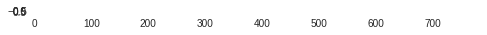

tensor([2, 5, 1, 8, 3, 6, 5, 7, 9, 9, 7, 9, 3, 1, 4, 7, 2, 0, 2, 4, 7, 4, 0, 4,
        9, 5, 4, 5, 8, 3, 9, 2, 6, 3, 9, 0, 8, 7, 0, 5, 9, 5, 1, 7, 3, 5, 6, 1,
        5, 5, 1, 8, 1, 7, 6, 5, 7, 1, 0, 2, 1, 4, 8, 0, 6, 8, 1, 4, 5, 1, 0, 9,
        7, 1, 4, 1, 5, 7, 5, 5, 4, 5, 4, 9, 9, 4, 7, 5, 8, 1, 8, 4, 9, 3, 1, 2,
        5, 4, 4, 7, 6, 6, 5, 8, 2, 3, 2, 3, 2, 7, 8, 3, 5, 6, 0, 4, 2, 9, 6, 3,
        6, 8, 8, 3, 8, 9, 4, 3, 3, 7, 7, 5, 9, 6, 3, 6, 7, 9, 7, 9, 9, 3, 9, 7,
        1, 1, 0, 1, 2, 7, 2, 9, 9, 0, 1, 7, 0, 2, 2, 9, 5, 5, 1, 6, 8, 5, 9, 2,
        7, 7, 2, 5, 5, 6, 1, 3, 1, 5, 3, 0, 2, 0, 4, 7, 0, 8, 9, 8, 0, 4, 2, 7,
        0, 1, 9, 3, 8, 5, 0, 4])


In [89]:
data, target = Variable(data), Variable(target)
data = data.view(-1, 28 * 28)
pred = net_out.data.max(1)[1]  # get t

pp.imshow(255-data, cmap='gray')
pp.show()
print(pred)

